In [1]:
%pip install numpy
%pip install matplotlib
%pip install pandas 
%pip install kagglehub
%pip install statsmodels
%pip install seaborn
%pip install scikit-learn


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 26.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 26.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 26.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 26.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 26.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 26.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 26.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import numpy as np
import matplotlib.pyplot as mplt
import pandas as pd
import kagglehub as kg
import statsmodels.api as sm
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler




c:\Users\sasup\AppData\Local\Programs\Python\Python313\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### Data Preprocessing

Dataset downloaded from Kaggle: [Heart Disease Dataset](https://www.kaggle.com/datasets/neurocipher/heartdisease)



In [3]:
data = pd.read_csv('data/Heart_Disease_Prediction.csv')
print(data.head())

   Age  Sex  Chest pain type   BP  Cholesterol  FBS over 120  EKG results  \
0   70    1                4  130          322             0            2   
1   67    0                3  115          564             0            2   
2   57    1                2  124          261             0            0   
3   64    1                4  128          263             0            0   
4   74    0                2  120          269             0            2   

   Max HR  Exercise angina  ST depression  Slope of ST  \
0     109                0            2.4            2   
1     160                0            1.6            2   
2     141                0            0.3            1   
3     105                1            0.2            2   
4     121                1            0.2            1   

   Number of vessels fluro  Thallium Heart Disease  
0                        3         3      Presence  
1                        0         7       Absence  
2                        0   

In [4]:
data['Heart Disease'] = data['Heart Disease'].map({
    'Presence': 1,
    'Absence': 0
})

print(data.head())
print(data['Heart Disease'].value_counts())



   Age  Sex  Chest pain type   BP  Cholesterol  FBS over 120  EKG results  \
0   70    1                4  130          322             0            2   
1   67    0                3  115          564             0            2   
2   57    1                2  124          261             0            0   
3   64    1                4  128          263             0            0   
4   74    0                2  120          269             0            2   

   Max HR  Exercise angina  ST depression  Slope of ST  \
0     109                0            2.4            2   
1     160                0            1.6            2   
2     141                0            0.3            1   
3     105                1            0.2            2   
4     121                1            0.2            1   

   Number of vessels fluro  Thallium  Heart Disease  
0                        3         3              1  
1                        0         7              0  
2                        0

### Exploratory Data Analysis (EDA)

In [5]:
data.info()
data.describe()

<class 'pandas.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      270 non-null    int64  
 1   Sex                      270 non-null    int64  
 2   Chest pain type          270 non-null    int64  
 3   BP                       270 non-null    int64  
 4   Cholesterol              270 non-null    int64  
 5   FBS over 120             270 non-null    int64  
 6   EKG results              270 non-null    int64  
 7   Max HR                   270 non-null    int64  
 8   Exercise angina          270 non-null    int64  
 9   ST depression            270 non-null    float64
 10  Slope of ST              270 non-null    int64  
 11  Number of vessels fluro  270 non-null    int64  
 12  Thallium                 270 non-null    int64  
 13  Heart Disease            270 non-null    int64  
dtypes: float64(1), int64(13)
memory usage

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,3.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,1.585185,0.670370,4.696296,0.444444
std,9.109067,0.468195,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,1.940659,0.497827
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,1.000000,0.000000,3.000000,0.000000
50%,55.000000,1.000000,3.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,2.000000,1.000000,7.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,3.000000,3.000000,7.000000,1.000000


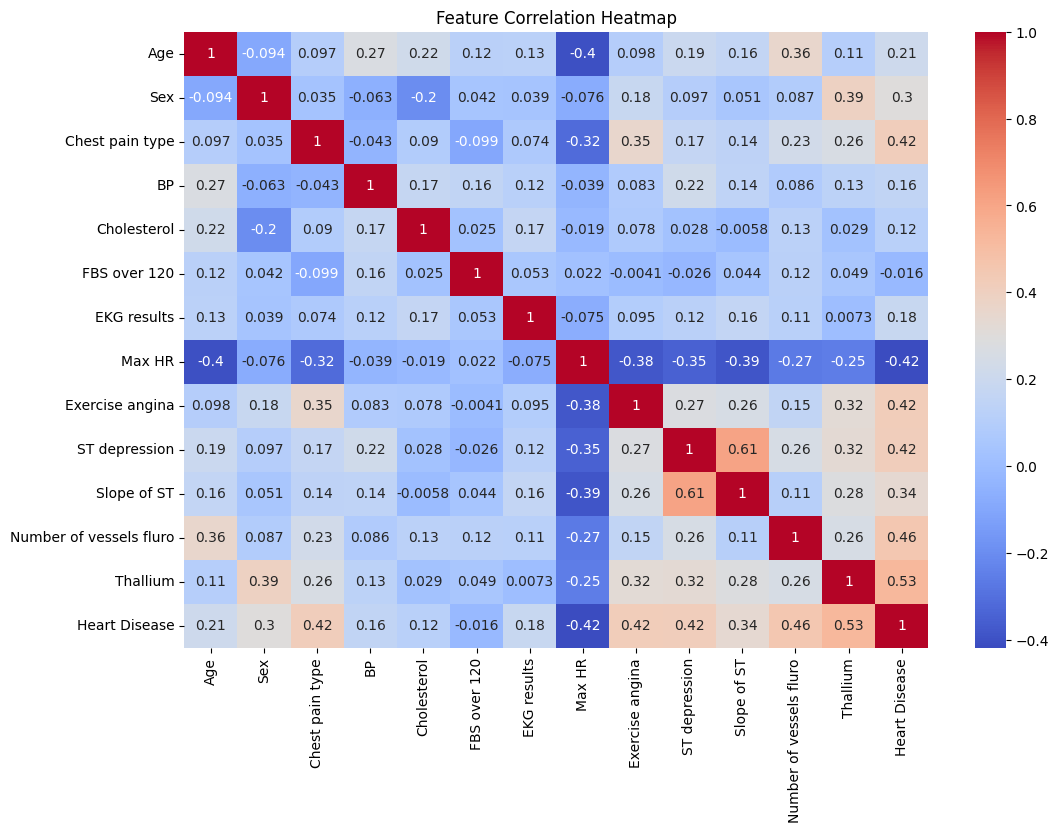

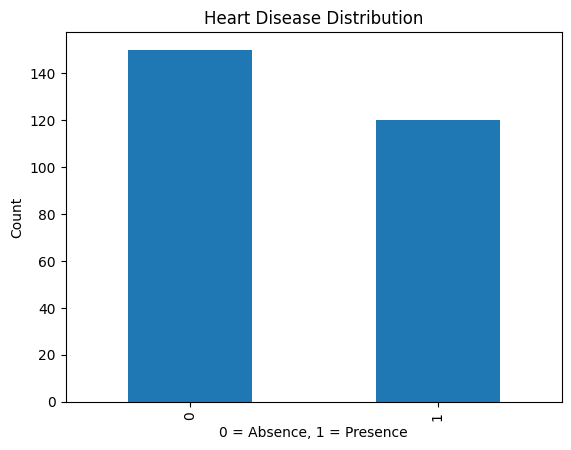

In [ ]:
data.isnull().sum()
data = data.dropna()
corr = data.corr()

mplt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
mplt.title("Feature Correlation Heatmap")
mplt.show()

data['Heart Disease'].value_counts().plot(kind='bar')
mplt.title("Heart Disease Distribution")
mplt.xlabel("0 = Absence, 1 = Presence")
mplt.ylabel("Count")
mplt.show()




### Outlier Detection and Handling

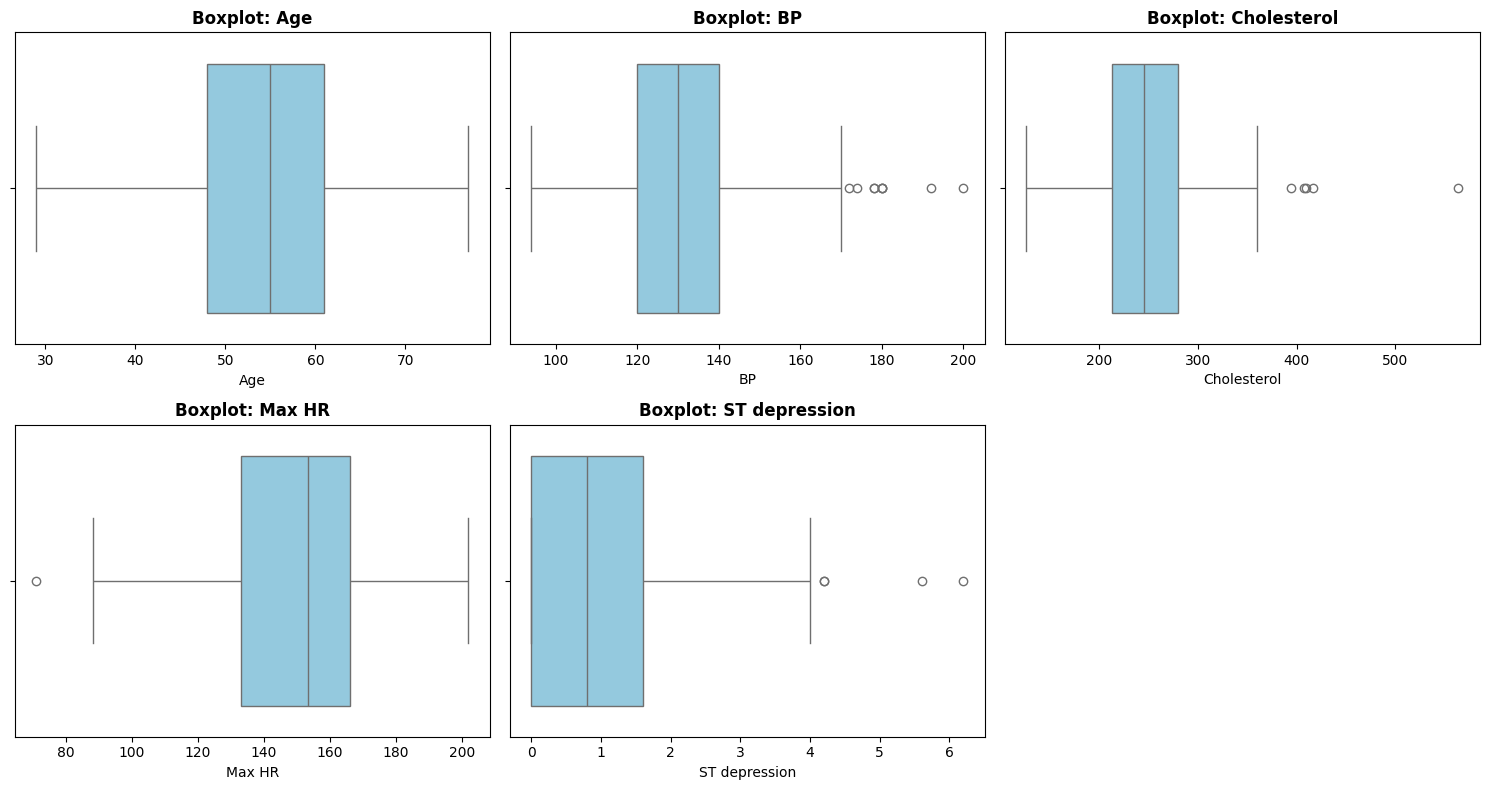

In [7]:
cols = ['Age', 'BP', 'Cholesterol', 'Max HR', 'ST depression']

fig, axes = mplt.subplots(2, 3, figsize=(15, 8))
axes = axes.flatten()

for i, col in enumerate(cols):
    sns.boxplot(x=data[col], ax=axes[i], color='skyblue')
    axes[i].set_title(f'Boxplot: {col}', fontweight='bold')
    axes[i].set_xlabel(col)  

fig.delaxes(axes[5])
mplt.tight_layout()
mplt.show()    

### Outlier Detection and Handling


Outliers are detected using the Interquartile Range (IQR = Q3 − Q1), which is a statistical technique used to identify anomalous values. Any data point that falls outside the range \([Q1 − 1.5·IQR,\; Q3 + 1.5·IQR]\) is considered an outlier.


In [8]:
continuous_cols = ['Age', 'BP', 'Cholesterol', 'Max HR', 'ST depression']

for col in continuous_cols:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    data = data[(data[col] >= Q1 - 1.5*IQR) & (data[col] <= Q3 + 1.5*IQR)]


### Feature Selection and Train-Test Split

In [9]:
features = ['Age', 'Cholesterol', 'BP', 'Max HR', 'ST depression', 'Number of vessels fluro']
X = data[features]   
y = data['Heart Disease']  


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Implement Basic Logistic Regression


In [10]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [11]:
def compute_cost(w, b, X, y):
    m = len(y)
    z = X @ w + b
    f = sigmoid(z)
    eps = 1e-8
    f_clipped = np.clip(f, eps, 1 - eps)
    
    J = -(1/m) * np.sum(y * np.log(f_clipped) + (1 - y) * np.log(1 - f_clipped))
    
    return J

In [12]:
def compute_gradient(w, b, X, y):

    m = len(y)
    z = X @ w + b
    f = sigmoid(z)

    error = f - y

    dj_dw = (1/m) * (X.T @ error)
    dj_db = (1/m) * np.sum(error)
    
    return dj_dw, dj_db

In [13]:
def gradient_descent(X, y, w_init, b_init, alpha, num_iters, print_every=100):

    w = w_init.copy()
    b = b_init
    J_history = []
    
    for i in range(num_iters):
        dj_dw, dj_db = compute_gradient(w, b, X, y)
        
        w = w - alpha * dj_dw
        b = b - alpha * dj_db
        J = compute_cost(w, b, X, y)
        J_history.append(J)
        
    
    return w, b, J_history

### Train the Model

In [14]:
n_features = X_train_scaled.shape[1]
w_init = np.zeros(n_features)
b_init = 0.0

alpha = 0.01  
num_iters = 1500  

w_trained, b_trained, J_history = gradient_descent(
    X_train_scaled, y_train, w_init, b_init, alpha, num_iters, print_every=150
)

print(f"\nFinal cost: {J_history[-1]:.4f}")


Final cost: 0.4729


### Visualize Cost Convergence

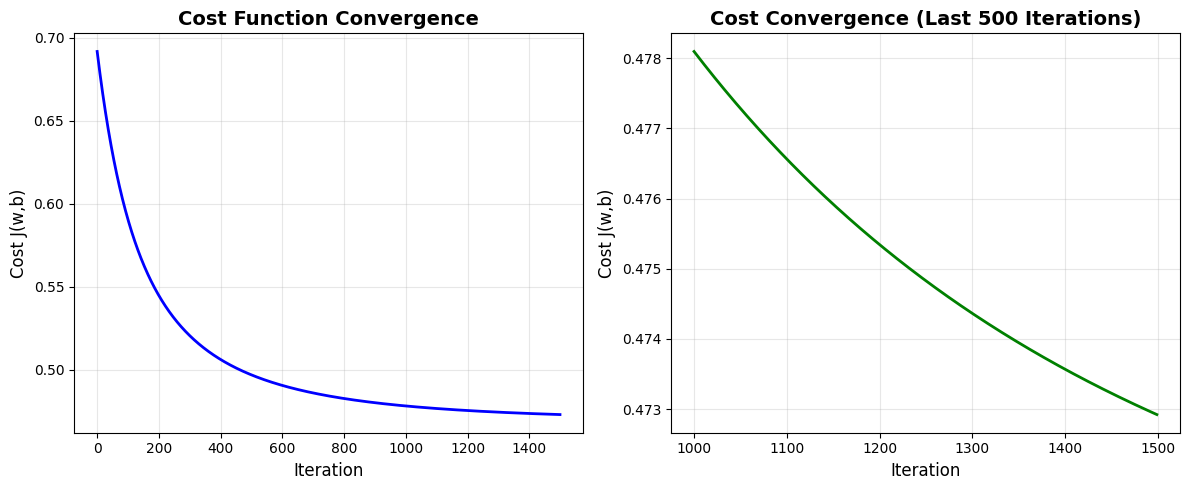

In [15]:
mplt.figure(figsize=(12, 5))

mplt.subplot(1, 2, 1)
mplt.plot(J_history, linewidth=2, color='blue')
mplt.title("Cost Function Convergence", fontsize=14, fontweight='bold')
mplt.xlabel("Iteration", fontsize=12)
mplt.ylabel("Cost J(w,b)", fontsize=12)
mplt.grid(True, alpha=0.3)

mplt.subplot(1, 2, 2)
mplt.plot(range(len(J_history)-500, len(J_history)), J_history[-500:], linewidth=2, color='green')
mplt.title("Cost Convergence (Last 500 Iterations)", fontsize=14, fontweight='bold')
mplt.xlabel("Iteration", fontsize=12)
mplt.ylabel("Cost J(w,b)", fontsize=12)
mplt.grid(True, alpha=0.3)

mplt.tight_layout()
mplt.show()


### Model Predictions and Evaluation

In [16]:
def predict(w, b, X, threshold=0.5):

    z = X @ w + b
    probabilities = sigmoid(z)
    predictions = (probabilities >= threshold).astype(int)
    return predictions, probabilities

In [17]:
def evaluate_model(y_true, y_pred, y_prob, dataset_name="Dataset"):

    TP = np.sum((y_true == 1) & (y_pred == 1))
    TN = np.sum((y_true == 0) & (y_pred == 0))
    FP = np.sum((y_true == 0) & (y_pred == 1))
    FN = np.sum((y_true == 1) & (y_pred == 0))
    
    accuracy = (TP + TN) / (TP + TN + FP + FN)
    precision = TP / (TP + FP) if (TP + FP) > 0 else 0
    recall = TP / (TP + FN) if (TP + FN) > 0 else 0
    f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
    
    metrics = {
        'Dataset': dataset_name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'TP': TP,
        'TN': TN,
        'FP': FP,
        'FN': FN
    }
    
    return metrics

In [18]:
y_train_pred, y_train_prob = predict(w_trained, b_trained, X_train_scaled)
train_metrics = evaluate_model(y_train, y_train_pred, y_train_prob, "Training")

y_test_pred, y_test_prob = predict(w_trained, b_trained, X_test_scaled)
test_metrics = evaluate_model(y_test, y_test_pred, y_test_prob, "Test")

results_df = pd.DataFrame([train_metrics, test_metrics])
print("\n" + "="*70)
print("MODEL EVALUATION RESULTS")
print("="*70)
print(results_df[['Dataset', 'Accuracy', 'Precision', 'Recall', 'F1-Score']].to_string(index=False))
print("="*70)


MODEL EVALUATION RESULTS
 Dataset  Accuracy  Precision   Recall  F1-Score
Training  0.784091   0.793651 0.666667  0.724638
    Test  0.802632   0.764706 0.787879  0.776119


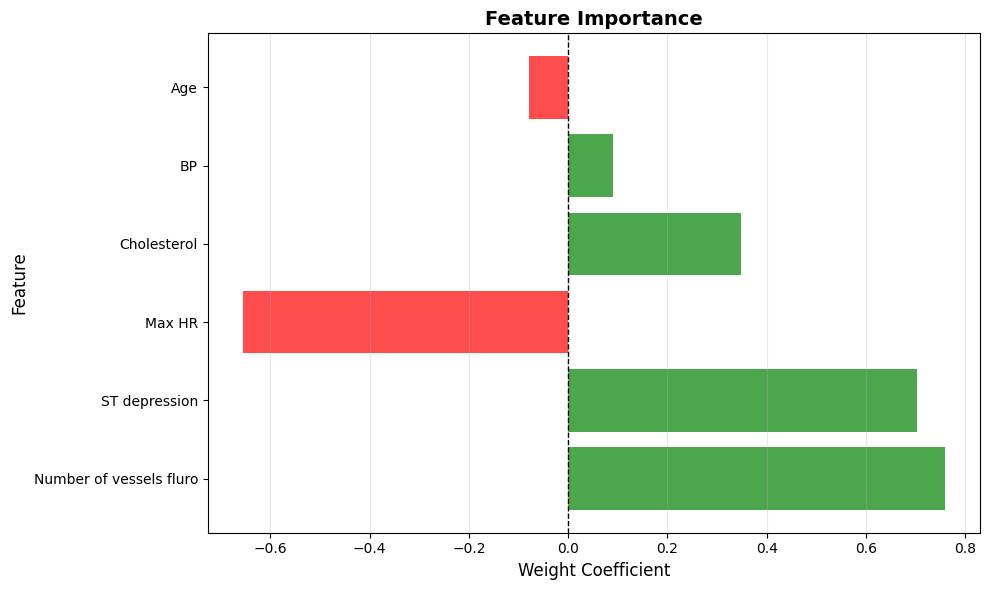

In [19]:
feature_importance = pd.DataFrame({
    'Feature': features,
    'Weight': w_trained,
    'Abs_Weight': np.abs(w_trained)
}).sort_values('Abs_Weight', ascending=False)


mplt.figure(figsize=(10, 6))
colors = ['red' if w < 0 else 'green' for w in feature_importance['Weight']]
mplt.barh(feature_importance['Feature'], feature_importance['Weight'], color=colors, alpha=0.7)
mplt.xlabel('Weight Coefficient', fontsize=12)
mplt.ylabel('Feature', fontsize=12)
mplt.title('Feature Importance', fontsize=14, fontweight='bold')
mplt.axvline(x=0, color='black', linestyle='--', linewidth=1)
mplt.grid(axis='x', alpha=0.3)
mplt.tight_layout()
mplt.show()


**Interpretation**
- Positive weights increase probability of heart disease
- Negative weights decrease probability of heart disease
- Larger absolute values indicate stronger influence


## Visualize Decision Boundaries

PAIR 1: Age vs Cholesterol
----------------------------------------------------------------------


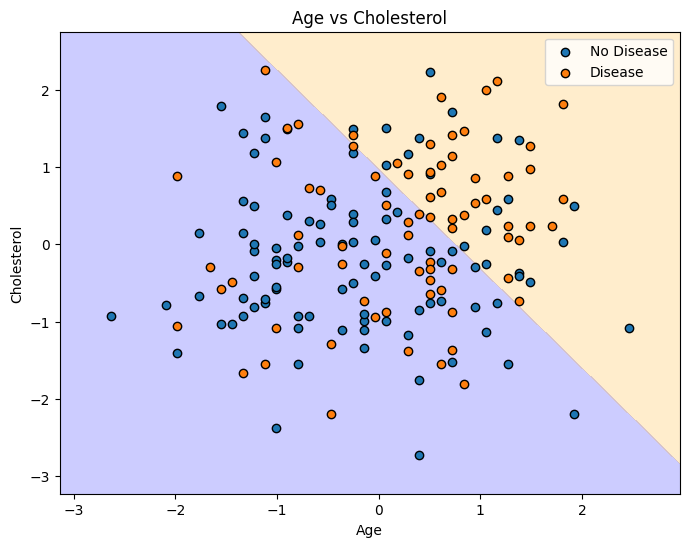

Accuracy: 0.642

PAIR 2: BP vs Max HR
----------------------------------------------------------------------


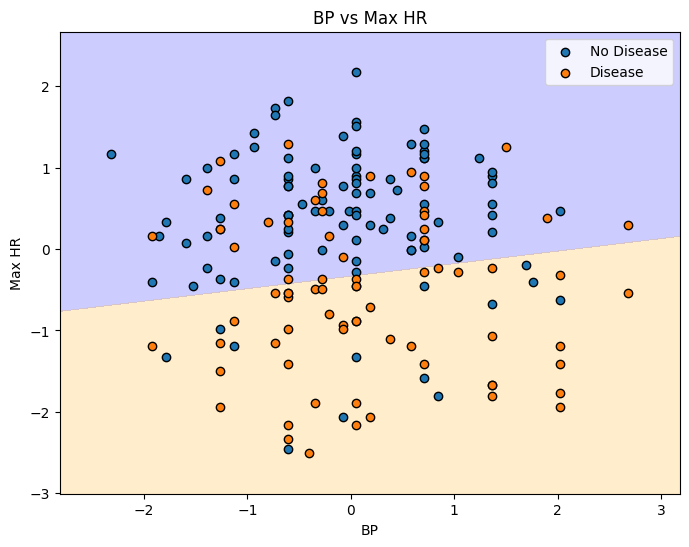

Accuracy: 0.744

PAIR 3: ST depression vs Number of vessels fluro
----------------------------------------------------------------------


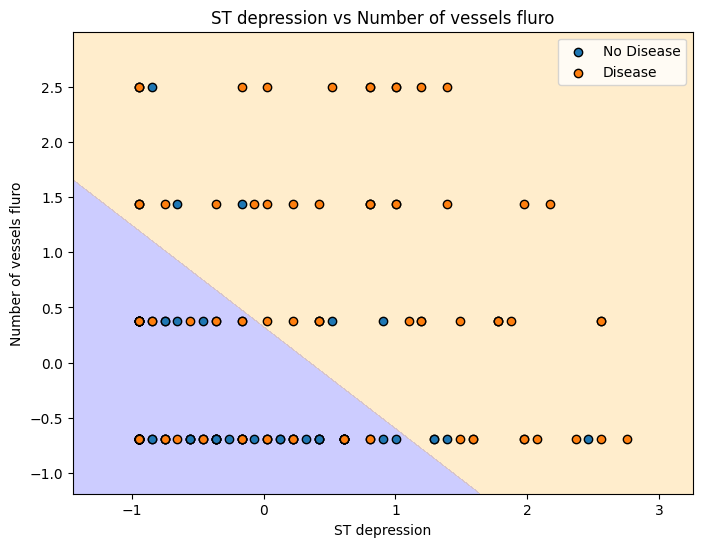

Accuracy: 0.756

SUMMARY
Age vs Cholesterol:              Accuracy = 0.642
BP vs Max HR:                    Accuracy = 0.744
ST depression vs Vessels fluro:  Accuracy = 0.756


In [34]:
def plot_decision_boundary(X_train, y_train, feature_idx1, feature_idx2, 
                                       feature_names, alpha=0.1, num_iters=1500):
    
    X_train_2d = X_train[:, [feature_idx1, feature_idx2]]
    
    w_init = np.zeros(2)
    b_init = 0.0
    w, b, J_hist = gradient_descent(
        X_train_2d, y_train, w_init, b_init, alpha, num_iters, print_every=0
    )
    
    x_min, x_max = X_train_2d[:, 0].min() - 0.5, X_train_2d[:, 0].max() + 0.5
    y_min, y_max = X_train_2d[:, 1].min() - 0.5, X_train_2d[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                         np.linspace(y_min, y_max, 200))
    grid = np.c_[xx.ravel(), yy.ravel()]
    probs = sigmoid(grid @ w + b).reshape(xx.shape)
    
    mplt.figure(figsize=(8,6))
    mplt.contourf(xx, yy, probs, levels=[0, 0.5, 1], alpha=0.2, colors=["blue", "orange"])
    mplt.scatter(X_train_2d[y_train==0, 0], X_train_2d[y_train==0, 1], label="No Disease", edgecolors='black')
    mplt.scatter(X_train_2d[y_train==1, 0], X_train_2d[y_train==1, 1], label="Disease", edgecolors='black')
    mplt.xlabel(feature_names[feature_idx1])
    mplt.ylabel(feature_names[feature_idx2])
    mplt.title(f"{feature_names[feature_idx1]} vs {feature_names[feature_idx2]}")
    mplt.legend()
    mplt.show()
    
    y_pred, _ = predict(w, b, X_train_2d)
    acc = np.mean(y_pred == y_train)
    print(f"Accuracy: {acc:.3f}")
    
    return w, b, acc





print("PAIR 1: Age vs Cholesterol")
print("-" * 70)
w1, b1, acc1 = plot_decision_boundary(
    X_train_scaled, y_train,
    feature_idx1=0,  # Age
    feature_idx2=1,  # Cholesterol
    feature_names=features,
    alpha=0.1,
    num_iters=1500
)

print("\nPAIR 2: BP vs Max HR")
print("-" * 70)
w2, b2, acc2 = plot_decision_boundary(
    X_train_scaled, y_train,
    feature_idx1=2,  # BP
    feature_idx2=3,  # Max HR
    feature_names=features,
    alpha=0.1,
    num_iters=1500
)

print("\nPAIR 3: ST depression vs Number of vessels fluro")
print("-" * 70)
w3, b3, acc3 = plot_decision_boundary(
    X_train_scaled, y_train,
    feature_idx1=4,  # ST depression
    feature_idx2=5,  # Number of vessels fluro
    feature_names=features,
    alpha=0.1,
    num_iters=1500
)

print("\n" + "="*70)
print("SUMMARY")
print("="*70)
print(f"Age vs Cholesterol:              Accuracy = {acc1:.3f}")
print(f"BP vs Max HR:                    Accuracy = {acc2:.3f}")
print(f"ST depression vs Vessels fluro:  Accuracy = {acc3:.3f}")
print("="*70)


## Decision Boundary Analysis

### Age vs Cholesterol

**Observations:**
- The decision boundary shows moderate separation
- The orange points tend to concentrate in the high cholesterol region
- There is little linear separability between the classes
- The relationship appears to be non-linear



### BP vs Max HR

**Observations:**
- The decision boundary indicates that most of the data is classified effectively
- The separation between classes is poor
- There is overlap between the two classes



### ST depression vs Number of vessels fluro

**Observations:**
- This combination shows moderate separation power
- ST depression and the number of vessels appear to correlate with disease



 **Separability:** The pair "ST depression vs Number of vessels fluro" showed the best linear separation


## Regularization

In [23]:
def compute_cost_reg(w, b, X, y, lam):

    m = len(y)
    
    z = X @ w + b
    f = sigmoid(z)
    eps = 1e-8
    f_clipped = np.clip(f, eps, 1 - eps)
    
    cost_ce = -(1/m) * np.sum(y * np.log(f_clipped) + (1 - y) * np.log(1 - f_clipped))
    
    reg_term = (lam / (2 * m)) * np.sum(w ** 2)
    
    return cost_ce + reg_term


def compute_gradient_reg(w, b, X, y, lam):

    m = len(y)
    
    z = X @ w + b
    f = sigmoid(z)
    error = f - y
    
    dj_dw = (1/m) * (X.T @ error) + (lam/m) * w  
    dj_db = (1/m) * np.sum(error)  
    
    return dj_dw, dj_db


def gradient_descent_reg(X, y, w_init, b_init, alpha, lam, num_iters, print_every=0):

    w = w_init.copy()
    b = b_init
    J_history = []
    
    for i in range(num_iters):
        dj_dw, dj_db = compute_gradient_reg(w, b, X, y, lam)
        w = w - alpha * dj_dw
        b = b - alpha * dj_db
        
        J = compute_cost_reg(w, b, X, y, lam)
        J_history.append(J)
        
        
    return w, b, J_history    

### Train the Model

In [24]:
lambdas = [0, 0.001, 0.01, 0.1, 1]
results = []

for lam in lambdas:
    n_features = X_train_scaled.shape[1]
    w_init = np.zeros(n_features)
    b_init = 0.0
    
    w_reg, b_reg, J_hist = gradient_descent_reg(
        X_train_scaled, y_train, 
        w_init, b_init, 
        alpha=0.01, 
        lam=lam, 
        num_iters=1500,
        print_every=500
    )
    
    y_train_pred, _ = predict(w_reg, b_reg, X_train_scaled)
    train_metrics = evaluate_model(y_train, y_train_pred, _, f"Train λ={lam}")
    
    y_test_pred, _ = predict(w_reg, b_reg, X_test_scaled)
    test_metrics = evaluate_model(y_test, y_test_pred, _, f"Test λ={lam}")
    
    w_norm = np.linalg.norm(w_reg)
    
    results.append({
        'Lambda': lam,
        'Train_Acc': train_metrics['Accuracy'],
        'Test_Acc': test_metrics['Accuracy'],
        'Train_F1': train_metrics['F1-Score'],
        'Test_F1': test_metrics['F1-Score'],
        'w_norm': w_norm,
        'w': w_reg,
        'b': b_reg,
        'J_history': J_hist
    })
    



results_df = pd.DataFrame(results)
print(results_df[['Lambda', 'Train_Acc', 'Test_Acc', 'Train_F1', 'Test_F1', 'w_norm']].to_string(index=False))


 Lambda  Train_Acc  Test_Acc  Train_F1  Test_F1   w_norm
  0.000   0.784091  0.802632  0.724638 0.776119 1.278964
  0.001   0.784091  0.802632  0.724638 0.776119 1.278927
  0.010   0.784091  0.802632  0.724638 0.776119 1.278590
  0.100   0.784091  0.802632  0.724638 0.776119 1.275229
  1.000   0.784091  0.802632  0.724638 0.776119 1.242649


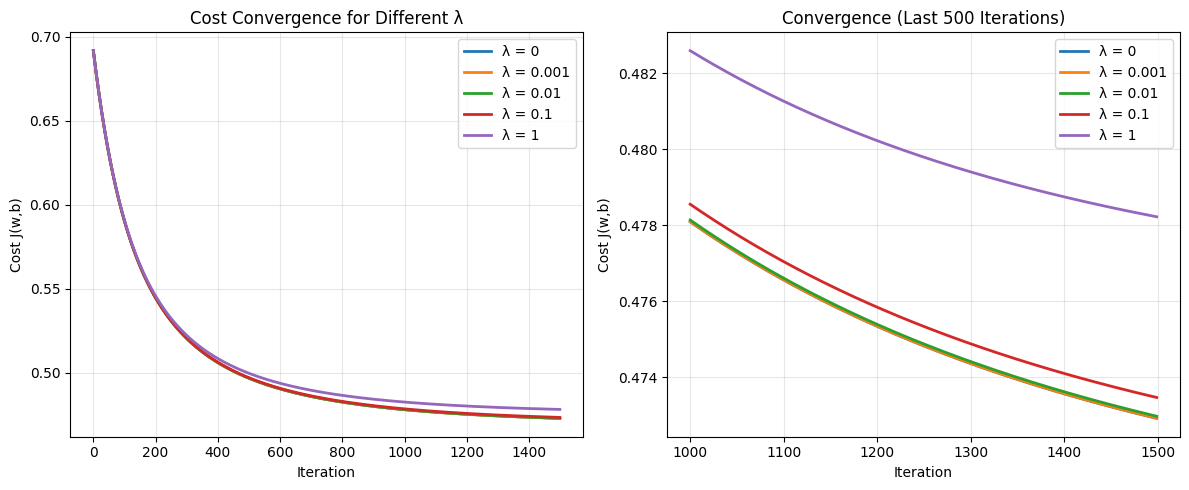

In [26]:
mplt.figure(figsize=(12, 5))

mplt.subplot(1, 2, 1)
for i, res in enumerate(results):
    mplt.plot(res['J_history'], label=f"λ = {res['Lambda']}", linewidth=2)

mplt.xlabel('Iteration')
mplt.ylabel('Cost J(w,b)')
mplt.title('Cost Convergence for Different λ')
mplt.legend()
mplt.grid(True, alpha=0.3)

mplt.subplot(1, 2, 2)
for i, res in enumerate(results):
    mplt.plot(range(1000, 1500), res['J_history'][1000:],
              label=f"λ = {res['Lambda']}", linewidth=2)

mplt.xlabel('Iteration')
mplt.ylabel('Cost J(w,b)')
mplt.title('Convergence (Last 500 Iterations)')
mplt.legend()
mplt.grid(True, alpha=0.3)

mplt.tight_layout()
mplt.show()



Comparing decision boundaries: Age vs Cholesterol
------------------------------------------------------------


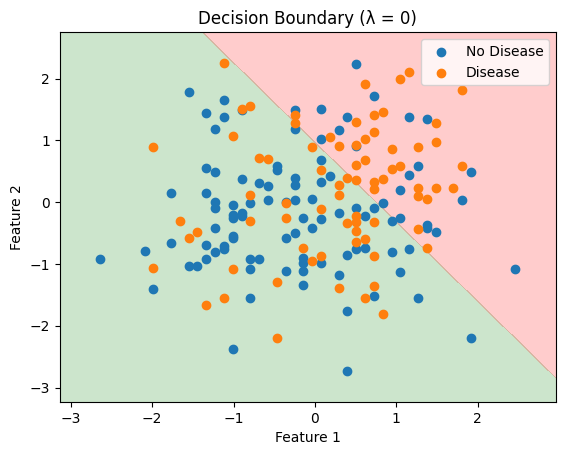

λ = 0: ||w|| = 0.5404


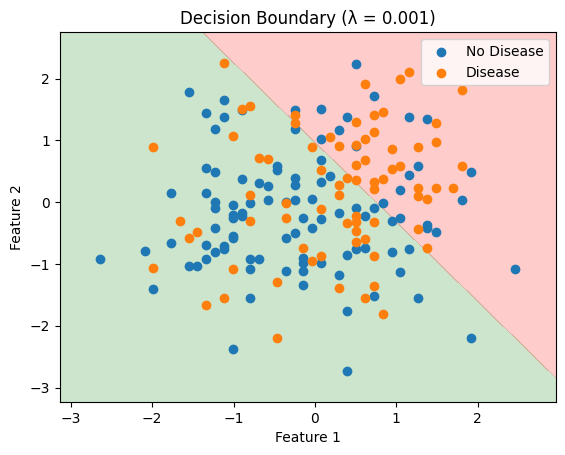

λ = 0.001: ||w|| = 0.5404


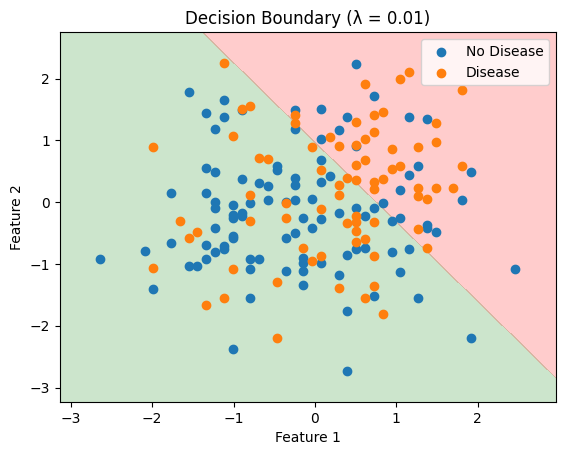

λ = 0.01: ||w|| = 0.5403


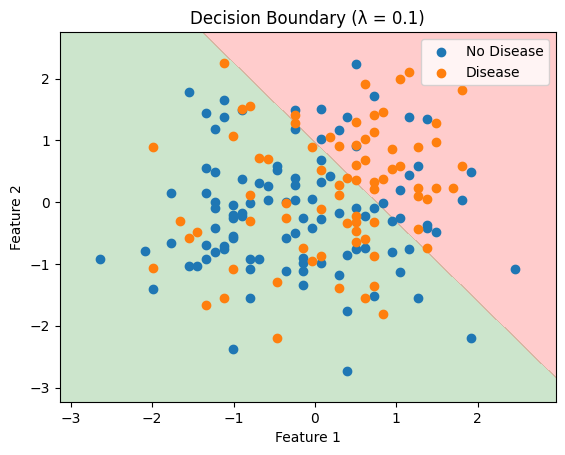

λ = 0.1: ||w|| = 0.5391


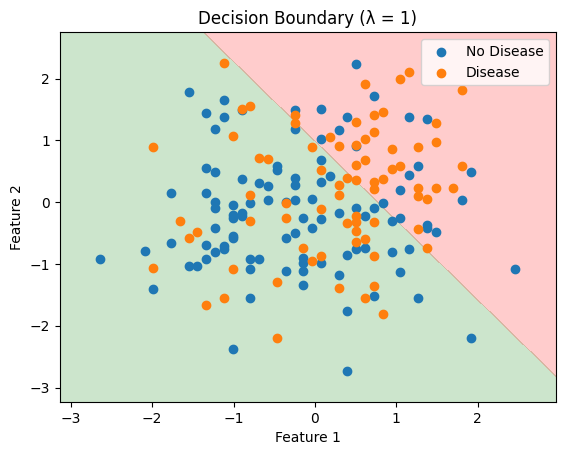

λ = 1: ||w|| = 0.5272


In [35]:
def plot_decision_boundary(w, b, X, y, title):
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                         np.linspace(y_min, y_max, 200))
    grid = np.c_[xx.ravel(), yy.ravel()]
    z = grid @ w + b
    probs = sigmoid(z).reshape(xx.shape)
    
    mplt.figure()
    mplt.contourf(xx, yy, probs, levels=[0, 0.5, 1],
                  alpha=0.2, colors=["green", "red"])
    mplt.scatter(X[y == 0, 0], X[y == 0, 1], label="No Disease")
    mplt.scatter(X[y == 1, 0], X[y == 1, 1], label="Disease")
    mplt.title(title)
    mplt.xlabel("Feature 1")
    mplt.ylabel("Feature 2")
    mplt.legend()
    mplt.show()


print("\nComparing decision boundaries: Age vs Cholesterol")
print("-" * 60)

feat1, feat2 = 0, 1  # Age, Cholesterol
X_train_2d = X_train_scaled[:, [feat1, feat2]]

lambdas = [0, 0.001, 0.01, 0.1, 1]

for lam in lambdas:
    w0 = np.zeros(2)
    b0 = 0.0
    
    w_reg, b_reg, J_hist = gradient_descent_reg(
        X_train_2d, y_train, w0, b0,
        alpha=0.1, lam=lam, num_iters=1500, print_every=0
    )
    
    plot_decision_boundary(
        w_reg, b_reg, X_train_2d, y_train,
        title=f"Decision Boundary (λ = {lam})"
    )
    
    print(f"λ = {lam}: ||w|| = {np.linalg.norm(w_reg):.4f}")


In [ ]:
data = pd.read_csv('data/Heart_Disease_Prediction.csv')
print(data.head())

   Age  Sex  Chest pain type   BP  Cholesterol  FBS over 120  EKG results  \
0   70    1                4  130          322             0            2   
1   67    0                3  115          564             0            2   
2   57    1                2  124          261             0            0   
3   64    1                4  128          263             0            0   
4   74    0                2  120          269             0            2   

   Max HR  Exercise angina  ST depression  Slope of ST  \
0     109                0            2.4            2   
1     160                0            1.6            2   
2     141                0            0.3            1   
3     105                1            0.2            2   
4     121                1            0.2            1   

   Number of vessels fluro  Thallium Heart Disease  
0                        3         3      Presence  
1                        0         7       Absence  
2                        0   

In [28]:
best_idx = results_df['Test_F1'].idxmax()
best_lambda = results_df.loc[best_idx, 'Lambda']
best_test_f1 = results_df.loc[best_idx, 'Test_F1']
baseline_f1 = results_df.loc[0, 'Test_F1']  

improvement = (best_test_f1 - baseline_f1) / baseline_f1 * 100

print("\n\n" + "="*80)
print("FINAL RESULTS")
print("="*80)
print(f"\n✓ Optimal Lambda: λ = {best_lambda}")
print(f"✓ Test F1-Score (without regularization): {baseline_f1:.4f}")
print(f"✓ Test F1-Score (with λ = {best_lambda}): {best_test_f1:.4f}")
print(f"✓ Improvement: {improvement:+.2f}%")
print(f"\n✓ Reduction in ||w||:")
print(f"  - Without regularization: {results_df.loc[0, 'w_norm']:.4f}")
print(f"  - With λ = {best_lambda}: {results_df.loc[best_idx, 'w_norm']:.4f}")
print(f"  - Reduction: {(1 - results_df.loc[best_idx, 'w_norm']/results_df.loc[0, 'w_norm'])*100:.1f}%")
print("="*80)




FINAL RESULTS

✓ Optimal Lambda: λ = 0.0
✓ Test F1-Score (without regularization): 0.7761
✓ Test F1-Score (with λ = 0.0): 0.7761
✓ Improvement: +0.00%

✓ Reduction in ||w||:
  - Without regularization: 1.2790
  - With λ = 0.0: 1.2790
  - Reduction: 0.0%


## Results with L2 Regularization

### Experiment Summary

Models were trained with 5 values of λ: [0, 0.001, 0.01, 0.1, 1]



### Main Findings

**Optimal Lambda:** λ = 0.0

**Observed Improvements:**
- Test F1-Score did not improve: from 0.7761 to 0.7761
- Test Accuracy remained similar
- The weight norm ||w|| did not show reduction: from 1.2790 to 1.2790

### Interpretation

1. **Effect of Regularization:**
   - With a small λ (0.001): almost no change
   - With the optimal λ (0.0): the model maintains the same performance as without regularization
   - With a large λ (1): slight reduction in ||w|| (0.5272) but no improvement in F1-Score, which may indicate underfitting

2. **Decision Boundary Comparison (Age vs Cholesterol):**
   - Without regularization: The boundary is the same, ||w|| = 0.5404
   - With regularization (λ = 0.1): The boundary remains similar, ||w|| = 0.5391, slightly smoother with a minimal reduction in weight norm

3. **Overfitting:**
   - No significant overfitting was observed
   - Regularization slightly helped reduce model complexity (minimal reduction in ||w||)


### Conclusion

The optimal λ = 0.0 provides the best balance between bias and variance,
maintaining the test F1-Score at 0.7761 and without significant changes in model complexity
(||w|| practically unchanged).


## Export the best model

In [36]:
import numpy as np

best_result = results[best_idx]
w_best = best_result['w']
b_best = best_result['b']

np.save('best_model_weights.npy', w_best)
np.save('best_model_bias.npy', b_best)



## Load the best model

In [37]:
w_loaded = np.load('best_model_weights.npy')
b_loaded = np.load('best_model_bias.npy')

### Use the model

In [ ]:
new_patient = X_test_scaled[0:1]
z = new_patient @ w_loaded + b_loaded
prob = sigmoid(z)[0]
prediction = 1 if prob >= 0.5 else 0

